In [25]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

#path = 'drive/My Drive/Linguistics MS/INFO 5502/'

murder_rates = Table.read_table('crime_rates-1.csv').select('State', 'Year', 'Population', 'Murder Rate')
murder_rates.set_format("Population", NumberFormatter)

State,Year,Population,Murder Rate
Alaska,1960,"226,167",10.2
Alaska,1961,"234,000",11.5
Alaska,1962,"246,000",4.5
Alaska,1963,"248,000",6.5
Alaska,1964,"250,000",10.4
Alaska,1965,"253,000",6.3
Alaska,1966,"272,000",12.9
Alaska,1967,"272,000",9.6
Alaska,1968,"277,000",10.5
Alaska,1969,"282,000",10.6


# Introduction
This assignment is copied from Data8.org, the original assignment can be found at github.com at:
https://github.com/data-8/data8assets/blob/gh-pages/materials/fa16/project/project2/project2.ipynb.
You may check the website for detail information.
In this assignment, you will investigate the relationship between murder and capital punishment (the death penalty) in the United States.


---

## 1.1 The Data
The main data source for this project comes from a paper by three researchers, Dezhbakhsh, Rubin,and Shepherd. The dataset contains rates of various violent crimes for every year 1960-2003 (44 years) in every US state. The researchers compiled their data from the FBI’s Uniform Crime Reports. Since crimes are committed by people, not states, we need to account for the number of people in each state when we’re looking at state-level data. Murder rates are calculated as follows:
murder rate for state X in year Y = 100000 * (number of murders in state X in year Y /
population in state X in year Y)

(Murder is rare, so we multiply by 100,000 just to avoid dealing with tiny numbers.)
So far, this looks like a dataset that lends itself to an observational study. In fact, these data aren’t even enough to demonstrate an association between the existence of the death penalty in a state in a year and the murder rate in that state and year!

### Question 1.1. What additional information will we need before we can check for that association?




---

We would need to know which states had the death penalty originally (before it was outlawed) and which didn't; to get a good idea of the effect of abolishing the death penalty, we could make a before/after comparison of the states where it was abolished, additionally comparing these to the states where no change was effected.



---


Murder rates vary over time, and different states exhibit different trends. The rates in some states change dramatically from year to year, while others are quite stable. Let’s plot a couple, just to see the variety.


---


### Question 1.2. Draw a line plot with years on the horizontal axis and murder rates on the vertical axis.

Include two lines: one for Alaska murder rates and one for Minnesota murder rates. Create this plot using a single call: ak mn.plot(’Year’).

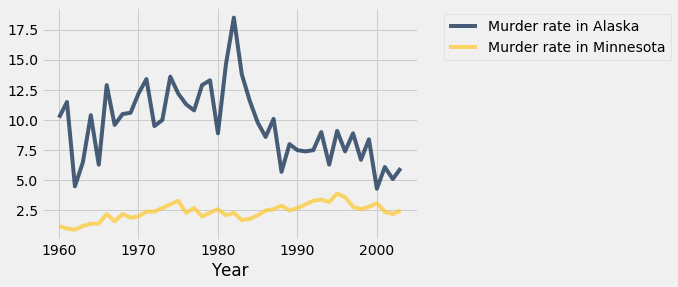

In [26]:
ak = murder_rates.where('State', 'Alaska').drop('State', 'Population').relabeled(1, 'Murder rate in Alaska')
mn = murder_rates.where('State', 'Minnesota').drop('State', 'Population').relabeled(1, 'Murder rate in Minnesota')

# Fill in this line to make a table like the one pictured above.
ak_mn = ak.join('Year', mn)
ak_mn.plot('Year')

### Question 1.3. Implement the function most murderous, which takes a year (an integer) as its argument.
It does two things:
1. It draws a horizontal bar chart of the 5 states that had the highest murder rate in that year.
2. It returns an array of the names of these states in order of increasing murder rate.

array(['Louisiana', 'Maryland', 'Mississippi', 'Nevada', 'Arizona'],
      dtype='<U11')

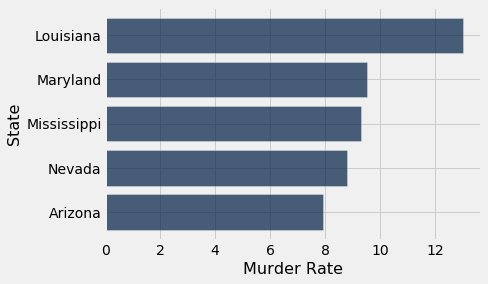

In [27]:
def most_murderous(year):
    most = murder_rates.where('Year', year).sort('Murder Rate', descending=True).take[:5]
    most.barh('State', 'Murder Rate')
    return most.column('State')

most_murderous(2003)

### Question 1.4. How many more people were murdered in California in 1988 than in 1975? Assign ca change to the answer.

In [28]:
ca = murder_rates.where('State', 'California')
ca_change = ((ca.where('Year', 1988)[3]/ca.where('Year', 1988)[2])*100000) - (ca.where('Year', 1975)[3]/ca.where('Year', 1975)[2])*100000
print(np.round(ca_change[0],2), "more people were murdered in California in 1988 than in 1975.")

-0.01 more people were murdered in California in 1988 than in 1975.


# 2. Changes in Murder Rates


---


Murder rates vary widely across states and years, presumably due to the vast array of differences among states and across US history. Rather than attempting to analyze rates themselves, here we will restrict our analysis to whether or not murder rates increased or decreased over certain time spans. We will not concern ourselves with how much rates increased or decreased; only the direction of the change - whether they increased or decreased.

The np.diff function takes an array of values and computes the differences between adjacent items of a list or array. Instead, we may wish to compute the difference between items that are two positions apart. For example, given a 5-element array, we may want:

[item 2 - item 0 , item 3 - item 1 , item 4 - item 2]

The diff_n function below computes this result. Don't worry if the implementation doesn't make sense to you, as long as you understand its behavior.

In [29]:
def diff_n(values, n):
    return np.array(values)[n:] - np.array(values)[:-n]

diff_n(make_array(1, 10, 100, 1000, 10000), 2)

array([  99,  990, 9900])

### Question 2.1. Implement the function two_year_changes that takes an array of murder rates for a state, ordered by increasing year. For all two-year periods (e.g., from 1960 to 1962), it computes and returns the number of increases minus the number of decreases.

For example, the rates r = make_array(10, 7, 12, 9, 13, 9, 11) contain three increases (10 to 12, 7 to 9, and 12 to 13), one decrease (13 to 11), and one change that is neither an increase or decrease (9 to 9). Therefore, two_year_changes(r) would return 2, the difference between three increases and 1 decrease.

In [30]:
def two_year_changes(rates):
    increases = []
    decreases = []
    "Return the number of increases minus the number of decreases after two years."
    for i in range(2, len(rates), 1):
      end = i
      start = i-2

      change = rates[end] - rates[start]
      if change > 0:
        increases.append(change)
      elif change < 0:
        decreases.append(change)
      else:
        pass

    rate = len(increases) - len(decreases)    
    return rate

print('Alaska:',    two_year_changes(ak.column('Murder rate in Alaska')))
print('Minnesota:', two_year_changes(mn.column('Murder rate in Minnesota')))

Alaska: -5
Minnesota: 6


### Question 2.2. Assign changes by state to a table with one row per state that has two columns: the State name and the Murder Rate two year changes statistic computed across all years in our data set for that state.

In [31]:
rates = murder_rates.drop('Population')
pivot = rates.pivot("State", "Year", values="Murder Rate", collect=np.mean)
pivot


Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachuse,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Isla,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1960,12.4,10.2,6,8.5,3.9,4.2,1.6,7.4,10.6,11.9,2.4,2.4,4.9,4.4,0.6,2.9,6.7,8.3,1.7,5.4,1.4,4.5,1.2,10,4.4,3.9,2.3,8.8,1.3,2.7,7.4,2.9,10.6,0.5,3.2,7.5,2.4,2.6,1,13.2,2.1,8.5,8.6,1,0.3,12.3,2.1,4.4,1.3,4.8
1961,12.9,11.5,6,9.1,3.7,4.7,1,4.4,9.1,10,2.3,2,4.8,4.1,1.3,1.9,6.5,6.4,1.6,4.5,1.5,4.1,1,10.3,5.1,2.5,2.4,7,0.6,2.5,6.8,3.5,9.2,0.9,3.1,5,2.7,2.6,1,11.6,1.7,8,8.1,1.7,1.5,8.6,2.2,4.4,1.6,3.3
1962,9.4,4.5,5.7,7.9,3.9,5,1.3,4.3,7.7,10.3,2.9,3,5.3,3.5,1.1,2.8,6.5,6.8,1.4,5.7,1.8,3.4,0.9,7.3,5.5,2.1,1.5,8.1,2.4,3,6.3,3.6,7.9,1.2,3.2,5.1,2.9,2.7,0.8,10.1,3.3,6.1,7.2,2.3,0.3,8.7,2.5,3.7,0.9,3.3
1963,10.2,6.5,6,7.4,3.8,4.8,1.8,5,8.2,9.4,1.7,2.5,5.1,2.8,1.3,2.6,5.6,6.9,1.9,6.3,1.9,3.5,1.2,7.2,5.2,2,2,7.9,3.2,2.8,5.6,3.8,8.2,2.1,3,5.2,3,2.3,1.4,10,1.2,6.5,7.4,2.4,0.5,7.1,2.5,5.3,1.7,3.6
1964,9.3,10.4,5.2,7.6,4.1,4.2,1.8,4.7,8.6,11.7,2.1,4,5.5,3,1.3,3.4,5.2,8.3,1.5,6.7,2,3.5,1.4,10.1,5.4,2.7,2.3,7.8,0.9,3.1,5.6,4.6,8,0.9,3.5,4.5,1.8,3.4,1.2,8.1,1.3,5.9,7.6,1.5,0.5,8.4,2.4,3.7,1.5,5.5
1965,11.4,6.3,5,5.9,4.7,3.5,1.6,5.7,8.9,11.3,3.2,2,5.2,3.5,1.3,2.7,5.3,8.1,2.1,6.7,2.4,4.6,1.4,8.9,6.7,1.7,2.4,8.4,2.7,3.2,6.3,4.6,8.3,0.9,3.6,4.4,3.4,3.6,2.1,9.6,1.6,8,7.5,1.5,0.5,8.2,2.2,4,1.5,2.9
1966,10.9,12.9,6.1,7.1,4.6,4,2,9,10.3,11.3,2.9,3,6.9,4,1.6,3.5,7,9.9,2.2,7,2.4,5,2.2,9.7,5.4,2.8,1.8,10.6,1.9,3.5,6.3,4.8,9.2,1.8,4.5,5.5,2.7,3.3,1.4,11.6,1.5,7.8,9.1,2,1.5,8.1,2.5,4.2,1.9,4.9
1967,11.7,9.6,5.6,8.8,5.4,4.1,2.4,8.6,10.5,11.1,2.4,4.3,7.3,3.8,1.5,4,7.2,9.3,0.4,8,2.8,6.5,1.6,8.7,7.3,2.4,2.7,10.8,2,3.9,6.6,5.4,9.9,0.2,5.2,6.7,3.1,3.9,2.2,11.2,3.7,8.9,9.9,2.7,3.1,9.1,3.1,4.6,1.9,4.8
1968,11.8,10.5,6.3,8.1,6,5.4,2.5,8.4,11.9,13.9,2.8,2.3,8.1,4.8,1.7,3.7,8.9,9.5,3,9.3,3.5,7.7,2.2,9.9,8.8,3.3,2.3,5.5,1.4,5.1,6.4,6.5,10.2,1.1,5.3,6.4,3.2,4.1,2.4,13.6,3.8,8.7,10.6,2.9,2.6,10.3,3.6,5.5,2.2,6.3
1969,13.7,10.6,6,9.9,7.1,5.3,2.9,8,11.3,11.9,3.4,1.9,8.6,5,1.4,3.5,10.4,9.5,1.6,9.3,3.5,8.8,1.9,8.1,10.4,3.6,2.5,9,2.5,5.2,6.3,7.2,11.3,0.2,6.4,5.8,4,4.1,3.1,12.5,2,9.6,11.3,2.5,2.5,7.3,3.6,5.6,2.1,10.3


In [32]:
minus_years = pivot.drop('Year') # Taking the year column out because we don't need it for this question.
labels = minus_years.column_labels 

changes_by_state = Table().with_column('State', labels)

changes = make_array()
for i, column in enumerate(minus_years.columns, 1):
  changes = np.append(changes, two_year_changes(column))

changes_by_state = changes_by_state.with_column('Two Year Changes', changes)
changes_by_state

State,Two Year Changes
Alabama,-6
Alaska,-5
Arizona,1
Arkansas,-1
California,17
Colorado,-4
Connecticut,4
Delaware,-3
Florida,-6
Georgia,-3


### Question 2.3. Assign total_changes to the total increases minus the total decreases for all two-year periods and all states in our data set.

In [33]:
total_changes = np.sum(changes_by_state[1])

print('Total increases minus total decreases, across all states and years:', total_changes)

Total increases minus total decreases, across all states and years: 45.0


### Question 2.4. Set num_changes to the number of different two-year periods in the entire data set that could result in a change of a state's murder rate. Include both those periods where a change occurred and the periods where a state's rate happened to stay the same.

For example, 1968 to 1970 of Alaska would count as one distinct two-year period.

In [34]:
def count_changes():
  """ Return the number of possible changes in the data set """
  num_changes = 0
  for i in range(2, len(pivot.column('Alabama')), 1):
    num_changes += 1
    
  num_changes = num_changes * minus_years.num_columns
  return num_changes

print("There are", count_changes(), "possible two-year changes in murder rates that could occur across all states and time periods.")

There are 2100 possible two-year changes in murder rates that could occur across all states and time periods.


**Null Hypothesis: State murder rates increase and decrease over two-year periods as if "increase" or "decrease" were sampled at random from a uniform distribution, like a fair coin flip.**

**Alternative Hypothesis: State murder rates are either more likely or less likely to increase than decrease over two-year periods.**

### Question 2.5. Given these null and alternative hypotheses, define a good test statistic.
Important requirements for your test statistic: Choose a test statistic for which large positive values are evidence in favor of the alternative hypothesis, and other values are evidence in favor of the null hypothesis. Your test statistic should depend only on whether murder rates increased or decreased,
not on the size of any change.


---



**Test statistic: the value of increases minus the value of decreases in two-year murder rate sampled across the time period**


---



In [35]:
uniform = Table().with_columns(
    "Change", make_array('Increase', 'Decrease'),
    "Chance", make_array(0.5,        0.5))
uniform.sample_from_distribution('Chance', 100)

Change,Chance,Chance sample
Increase,0.5,57
Decrease,0.5,43


### Question 2.6. Complete the simulation below, which samples num_changes increases/decreases at random many times and forms an empirical distribution of your test statistic under the null hypothesis. 

Your job is to fill in the function simulate_under_null, which simulates a single sample under the null hypothesis, and fill in its argument when it's called below.

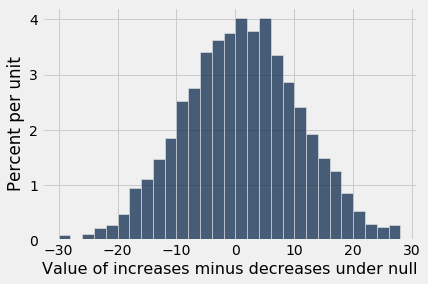

In [36]:
def simulate_under_null(num_chances_to_change):
    """Simulates some number changing several times, with an equal
    chance to increase or decrease.  Returns the value of your
    test statistic for these simulated changes.
    
    num_chances_to_change is the number of times the number changes.
    """
    uniform = Table().with_columns(
      "Change", make_array('Increase', 'Decrease'),
      "Chance", make_array(0.5,        0.5))
    uniform = uniform.sample_from_distribution('Chance', num_chances_to_change)
    return uniform.column(2)[0] - uniform.column(2)[1]
    

simulate_under_null(100)
uniform_samples = make_array()
for i in np.arange(5000):
    uniform_samples = np.append(uniform_samples, simulate_under_null(100))

# Feel free to change the bins if they don't make sense for your test statistic.    
Table().with_column('Value of increases minus decreases under null', uniform_samples).hist(0, bins=np.arange(-30, 30, 2))

### Question 2.7. Looking at this histogram, draw a conclusion about whether murder rates basically increase as often as they decrease. (You do not need to compute a P-value for this question.)


---


When given an equal change to increase or decrease, as in this function, it does seem that murder rates increase about as often as they decrease.



---

# 3. The death penalty

Some US states have the death penalty, and others don't, and laws have changed over time. In addition to changes in murder rates, we will also consider whether the death penalty was in force in each state and each year.

Using this information, we would like to investigate how the death penalty affects the murder rate of a state.



---

### Question 3.1. Describe this investigation in terms of an experiment. What population are we studying? What is the control group? What is the treatment group? What outcome are we measuring?

*Population*: The 50 United States

*Control Group*: States where the death penalty remained intact and was not reinstated.

*Treatment Group*: States where the death penalty was abolished

*Outcome*: Whether we could reasonably expect the results we see (in terms of murder rate increases/decreases) in the different state groups (death penalty vs. non) under the assumptions of random chance. If we could not, we can reject the null hypothesis.


---
### Question 3.2. We want to know whether the death penalty causes a change in the murder rate. Why is it not sufficient to compare murder rates in places and times when the death penalty was in force with places and times when it wasn't?

For several reasons: we don't know whether the differences we see in these contrasting times and places are due to the death penalty at all. Especially if we're grouping non-death-penalty states before the abolition of the death penalty with death-penalty states after the abolition. There are inter-state differences as well as intra-state differences that are not accounted for. For example, a state that abolished the death penalty may have had lower baseline murder rates in general, and the lower rate we see is not at all related to the death penalty.


In [37]:
non_death_penalty_states = make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')
def had_death_penalty_in_1971(state):
    """Returns True if the argument is the name of a state that had the death penalty in 1971."""
    # The implementation of this function uses a bit of syntax
    # we haven't seen before.  Just trust that it behaves as its
    # documentation claims.
    return state not in non_death_penalty_states

states = murder_rates.group('State').select('State')
death_penalty = states.with_column('Death Penalty', states.apply(had_death_penalty_in_1971, 0))
death_penalty

State,Death Penalty
Alabama,True
Alaska,False
Arizona,True
Arkansas,True
California,True
Colorado,True
Connecticut,True
Delaware,True
Florida,True
Georgia,True


In [38]:
num_death_penalty_states = death_penalty.where("Death Penalty", are.equal_to(True)).num_rows
num_death_penalty_states

44

### Question 3.3. Assign death_penalty_murder_rates to a table with the same columns and data as murder_rates, but that has only the rows for states that had the death penalty in 1971.

In [39]:
death_penalty_murder_rates = murder_rates.where('State', are.not_contained_in(non_death_penalty_states))
death_penalty_murder_rates

State,Year,Population,Murder Rate
Alabama,1960,"3,266,740",12.4
Alabama,1961,"3,302,000",12.9
Alabama,1962,"3,358,000",9.4
Alabama,1963,"3,347,000",10.2
Alabama,1964,"3,407,000",9.3
Alabama,1965,"3,462,000",11.4
Alabama,1966,"3,517,000",10.9
Alabama,1967,"3,540,000",11.7
Alabama,1968,"3,566,000",11.8
Alabama,1969,"3,531,000",13.7



### Question 3.4. Assign changes_72 to the value of the test statistic for the years 1971 to 1973 and the states in death_penalty_murder_rates.

In [40]:
penalty_rates = death_penalty_murder_rates.drop('Population')
penalty_pivot = penalty_rates.pivot("State", "Year", values="Murder Rate", collect=np.mean)

seventy_two = penalty_pivot.where('Year', are.between_or_equal_to(1971, 1973)) # Narrowing it down
seventy_two

seventy_two_changes = make_array()

for column in seventy_two.columns[1:]:
  change = column[2] - column[0]
  seventy_two_changes = np.append(seventy_two_changes, change)

test_stat_72 = np.sum(seventy_two_changes)
print('Increases minus decreases from 1971 to 1973:', np.round(test_stat_72, 2))

Increases minus decreases from 1971 to 1973: 26.7


###Question 3.5.: Draw an empirical histogram of the statistic under the null hypothesis by simulating the test statistic 5,000 times.

In [0]:
def simulate_difference(num_chances_to_change):
    null = Table().with_columns(
      "Change", make_array('Increase', 'Decrease'),
      "Chance", make_array(0.5,        0.5))
    null = null.sample_from_distribution('Chance', num_chances_to_change)
    return null.column(2)[0] - null.column(2)[1]

null_samples = make_array()
for i in np.arange(5000):
    null_samples = np.append(null_samples, simulate_difference(100))
simulated_changes = Table().with_column('Change', null_samples)

sample_changes = simulated_changes.sample(5000) # Grabbing a sample of counts.

In [42]:
def bootstrap_changes(sample, label, replications):
    bootstrap_array = make_array()
    for i in np.arange(replications):
        bootstrap_sample = sample.sample()
        sample_array = bootstrap_sample.column(0)
        bootstrap_array = np.append(bootstrap_array, sample_array)  
    print(bootstrap_array)
    return bootstrap_array

bootstrap = bootstrap_changes(sample_changes, 'Change', 5000)
lbound = np.round(percentile(2.5, bootstrap), 2)
rbound = np.round(percentile(97.5, bootstrap), 2)
confidence_interval = make_array([lbound, rbound])
simulated_changes_2 = Table().with_column('Bootstrap Sample Mean', bootstrap)

[  4. -10.   6. ... -16.  12.   6.]


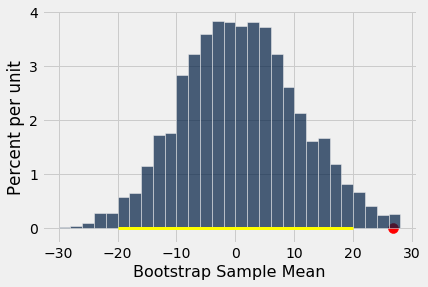

In [43]:
simulated_changes_2.hist(bins=np.arange(-30,30,2))
plt.plot(make_array(lbound, rbound), make_array(0, 0), color='yellow', lw=3);
plt.scatter(test_stat_72, 0, color='red', s=100);


It is clear that our observed change from 1971 - 1973 is outside the 95% confidence interval of our bootstrapped changes sample distribution, but what about its actual P value?

---


#Conclusion
### Question 3.6. Complete the analysis as follows:

Compute a P-value.
Draw a conclusion about the null and alternative hypotheses.
Describe your findings using simple, non-technical language. Be careful not to claim that the statistical analysis has established more than it really has.

P-value: 0.00541888

Conclusion about the hypotheses: The null hypothesis can be rejected; the alternative hypothesis, which states that the murder rate was more likely to increase or more likely to decrease, can be embraced.

Findings: The murder rate from 1971 - 1973 in the states that abolished the death penalty saw an increase that was statistically more likely than chance to occur. This does not necessarily establish causality.

In [44]:
empirical_P = np.count_nonzero(bootstrap >= test_stat_72) / 25000000
empirical_P

0.00441436

#4. Further evidence

###Question 4.1. Implement run_test, which takes the following arguments:

A table of murder rates for certain states, sorted by state and year like murder_rates, and the year when the analysis starts. (The comparison group is two years later.) It prints out the observed test statistic and returns the P-value for this statistic under the null hypothesis.

In [45]:
# Hint 1: You can complete most of this question by copying code you wrote earlier.
# Hint 2: This problem might seem daunting. Start by writing out the different steps involved in running a test.

def run_test(rates, start_year):
    """Return a P-value for the observed difference between increases and decreases."""
    end_year = start_year + 2
    penalty_rates =  rates.drop('Population')
    penalty_pivot = penalty_rates.pivot("State", "Year", values="Murder Rate", collect=np.mean)

    two_year_rates = penalty_pivot.where('Year', are.between_or_equal_to(start_year, end_year)) # Narrowing it down
    timespan_changes = make_array()

    for column in two_year_rates.columns[1:]:
      change = column[2] - column[0]
      timespan_changes = np.append(timespan_changes, change)

    observed_test_statistic = np.sum(timespan_changes)
    print('Test statistic', start_year, 'to', end_year, ':', np.round(observed_test_statistic, 2))
    
    null_samples = make_array()
    for i in np.arange(5000):
        null_samples = np.append(null_samples, simulate_difference(100))
    simulated_changes = Table().with_column('Change', null_samples)
    sample_changes = simulated_changes.sample(5000) # Grabbing a sample of counts

    bootstrap = bootstrap_changes(sample_changes, 'Change', 5000)
    simulated_changes_2 = Table().with_column('Bootstrap Sample Mean', bootstrap)

    p_value = np.count_nonzero(bootstrap >= observed_test_statistic) / 25000000
    print("The p value for the observed statistic over these two years is", np.round(p_value, 5))
    
run_test(death_penalty_murder_rates, 1971)
run_test(death_penalty_murder_rates, 1974)

Test statistic 1971 to 1973 : 26.7
[  0. -16.  -6. ...  -2. -14.   0.]
The p value for the observed statistic over these two years is 0.00519
Test statistic 1974 to 1976 : -44.1
[  8.  -8. -14. ...  -4.  -6. -10.]
The p value for the observed statistic over these two years is 1.0



### Question 4.3. Now we've analyzed states where the death penalty went away and came back, as well as states where the death penalty was outlawed all along. 

What do you conclude from the results of the tests we have conducted so far? Does all the evidence consistently point toward one conclusion, or is there a contradiction?



---

**I ran the preceding run_test() function on another time period that was not the 1971 - 1973 period under question; from 1974 - 1976, murder rates declined much more across this time period for non-death-penalty states. This should not necessarily be the case, given that these states abolished the death penalty, but murder rates declined precipitously anyway (much more than they increased over the 1971 - 1973 period). This strongly contradictory evidence indicates that we cannot assume that abolishing the death penalty is the cause of increased murder rates.**



---

#5 Visualization

### Question 5.1. Create a table called average_murder_rates with 1 row for each year in murder_rates. It should have 3 columns:

* Year, the year,
* Death penalty states, the average murder rate of the states that had the death penalty in 1971, and
* No death penalty states, the average murder rate of the other states.
average_murder_rates should be sorted in increasing order by year. Its first three rows should look like:

In [48]:
# First, we need to create the pivoted no_death_penalty_murder_rates table.

no_death_penalty_murder_rates = murder_rates.where('State', are.contained_in(non_death_penalty_states))
no_penalty_rates = no_death_penalty_murder_rates.drop('Population')
no_penalty_pivot = no_penalty_rates.pivot("State", "Year", values="Murder Rate", collect=np.mean)

means = make_array()
for row in no_penalty_pivot.rows:
  mean = np.round(np.mean(row[1:]), 2)
  means = np.append(means, mean)
no_penalty_pivot.with_column('Average Rates', means)

pen_means = make_array()
for row in penalty_pivot.rows:
  pen_mean = np.round(np.mean(row[1:]), 2)
  pen_means = np.append(pen_means, pen_mean)
penalty_pivot.with_column('Average Rates', pen_means)

average_murder_rates = Table().with_columns('Year', penalty_pivot.column(0), 'Death Penalty States', pen_means, 'No Death Penalty States', means)
average_murder_rates

Year,Death Penalty States,No Death Penalty States
1960,5.28,3.55
1961,4.78,3.68
1962,4.62,2.33
1963,4.61,2.75
1964,4.71,3.4
1965,4.83,3.18
1966,5.43,4.52
1967,5.88,3.73
1968,6.27,4.73
1969,6.5,4.73


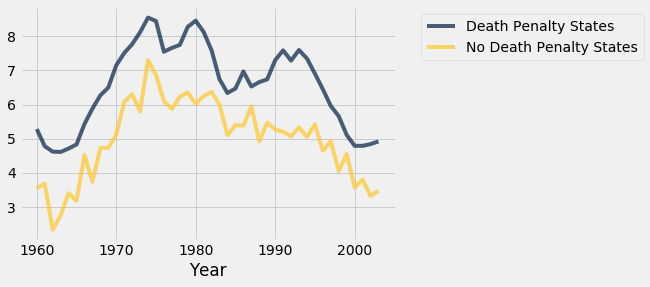

In [47]:
average_murder_rates.plot('Year')

### Question 5.2. Describe in one short sentence a high-level takeaway from the line plot below. Are the murder rates in these two groups of states related?

Visually, the murder rates in these two groups of states seem to be strongly related; increases and decreases happen with the same trends. While the group of death penalty states does have slightly higher murder rates, it seems that we cannot generalize and say that abolishing the death penalty caused higher murder rates, because for the period from 1971 - 1973 (the year before and after the death penalty was abolished), both death penalty states and non-death-penalty states saw a huge increase in murder rates.



---
The assignment states, "Canada has not executed a criminal since 1962. Since 1967, the only crime that can be punished by execution in Canada is the murder of on-duty law enforcement personnel. The paper states, "The most striking finding is that the homicide rate in Canada has moved in virtual lockstep with the rate in the United States.""



---


### Question 5.4. Complete their argument in 2-3 sentences; what features of these plots indicate that the death penalty is not an important factor in determining the murder rate? (If you're stuck, read the paper.)

Since the murder rate in the United States (where the death penalty has been variously abolished and reinstated) and the murder rate in Canada (where the death penalty was abolished) display the same trends, the increases and decreases we see cannot be attributed to the existence of the death penalty or lack thereof. While we could come to specious conclusions based on the statistically significant increase seen in the 1971 - 1973 time period, this increase does not stand up to the rest of the data.


---



### Question 5.5. What assumption(s) did we make in Parts 1 through 4 of the project that led us to believe that the death penalty deterred murder, when in fact the line plots tell a different story?

- We only considered the death penalty as a possible factor in murder rate, and didn't even mention the many other confounding factors. This could be any number of things: climate, gun policy, or unemployment rate.
- Another assumption we made was by calculating the murder rate from 1971 - 1973 before looking closely at the murder rate for any other two-year period. This assigned the 1971 - 1973 murder rate a false importance.